In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

In [29]:
dataset = pd.read_csv('data/aluguel_amostra.csv', sep=";")

In [30]:
dataset.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [31]:
q1 = dataset['Valor m2'].quantile(.25)

In [32]:
q3 = dataset['Valor m2'].quantile(.75)

In [33]:
iiq = q3 - q1

In [34]:
lower_limit = q1 - 1.5 * iiq
upper_limit = q3 + 1.5*iiq

In [35]:
q1


21.25

In [36]:
q3

42.31

In [37]:
iiq

21.060000000000002

In [38]:
lower_limit

-10.340000000000003

In [39]:
upper_limit

73.9

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

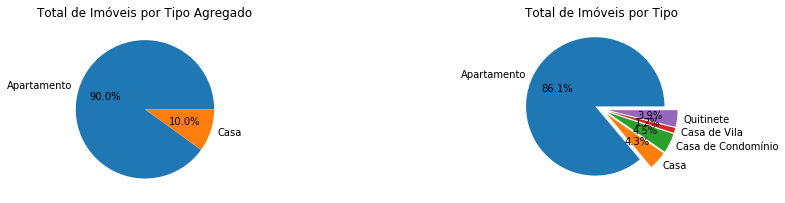

In [42]:
area = plt.figure()
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
grupo1 = dataset.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dataset.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')